In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [4]:
filepath = 'D:/data/Graduation/Contribution/RandomForest_output/'
dfa = pd.read_excel(filepath + 'RF_PRD.xlsx', index_col=0)
dfd = pd.read_excel(filepath + 'RF_PRD_diurnal.xlsx', index_col=0)
dfn = pd.read_excel(filepath + 'RF_PRD_nocturnal.xlsx', index_col=0)

In [19]:
variants = ['SFC_TMP', 'SOL_RAD', 'RH', 'PRES',
            'WSPD10', 'WDIR10', 'CloudFRAC']

dfa = dfa.loc[variants]

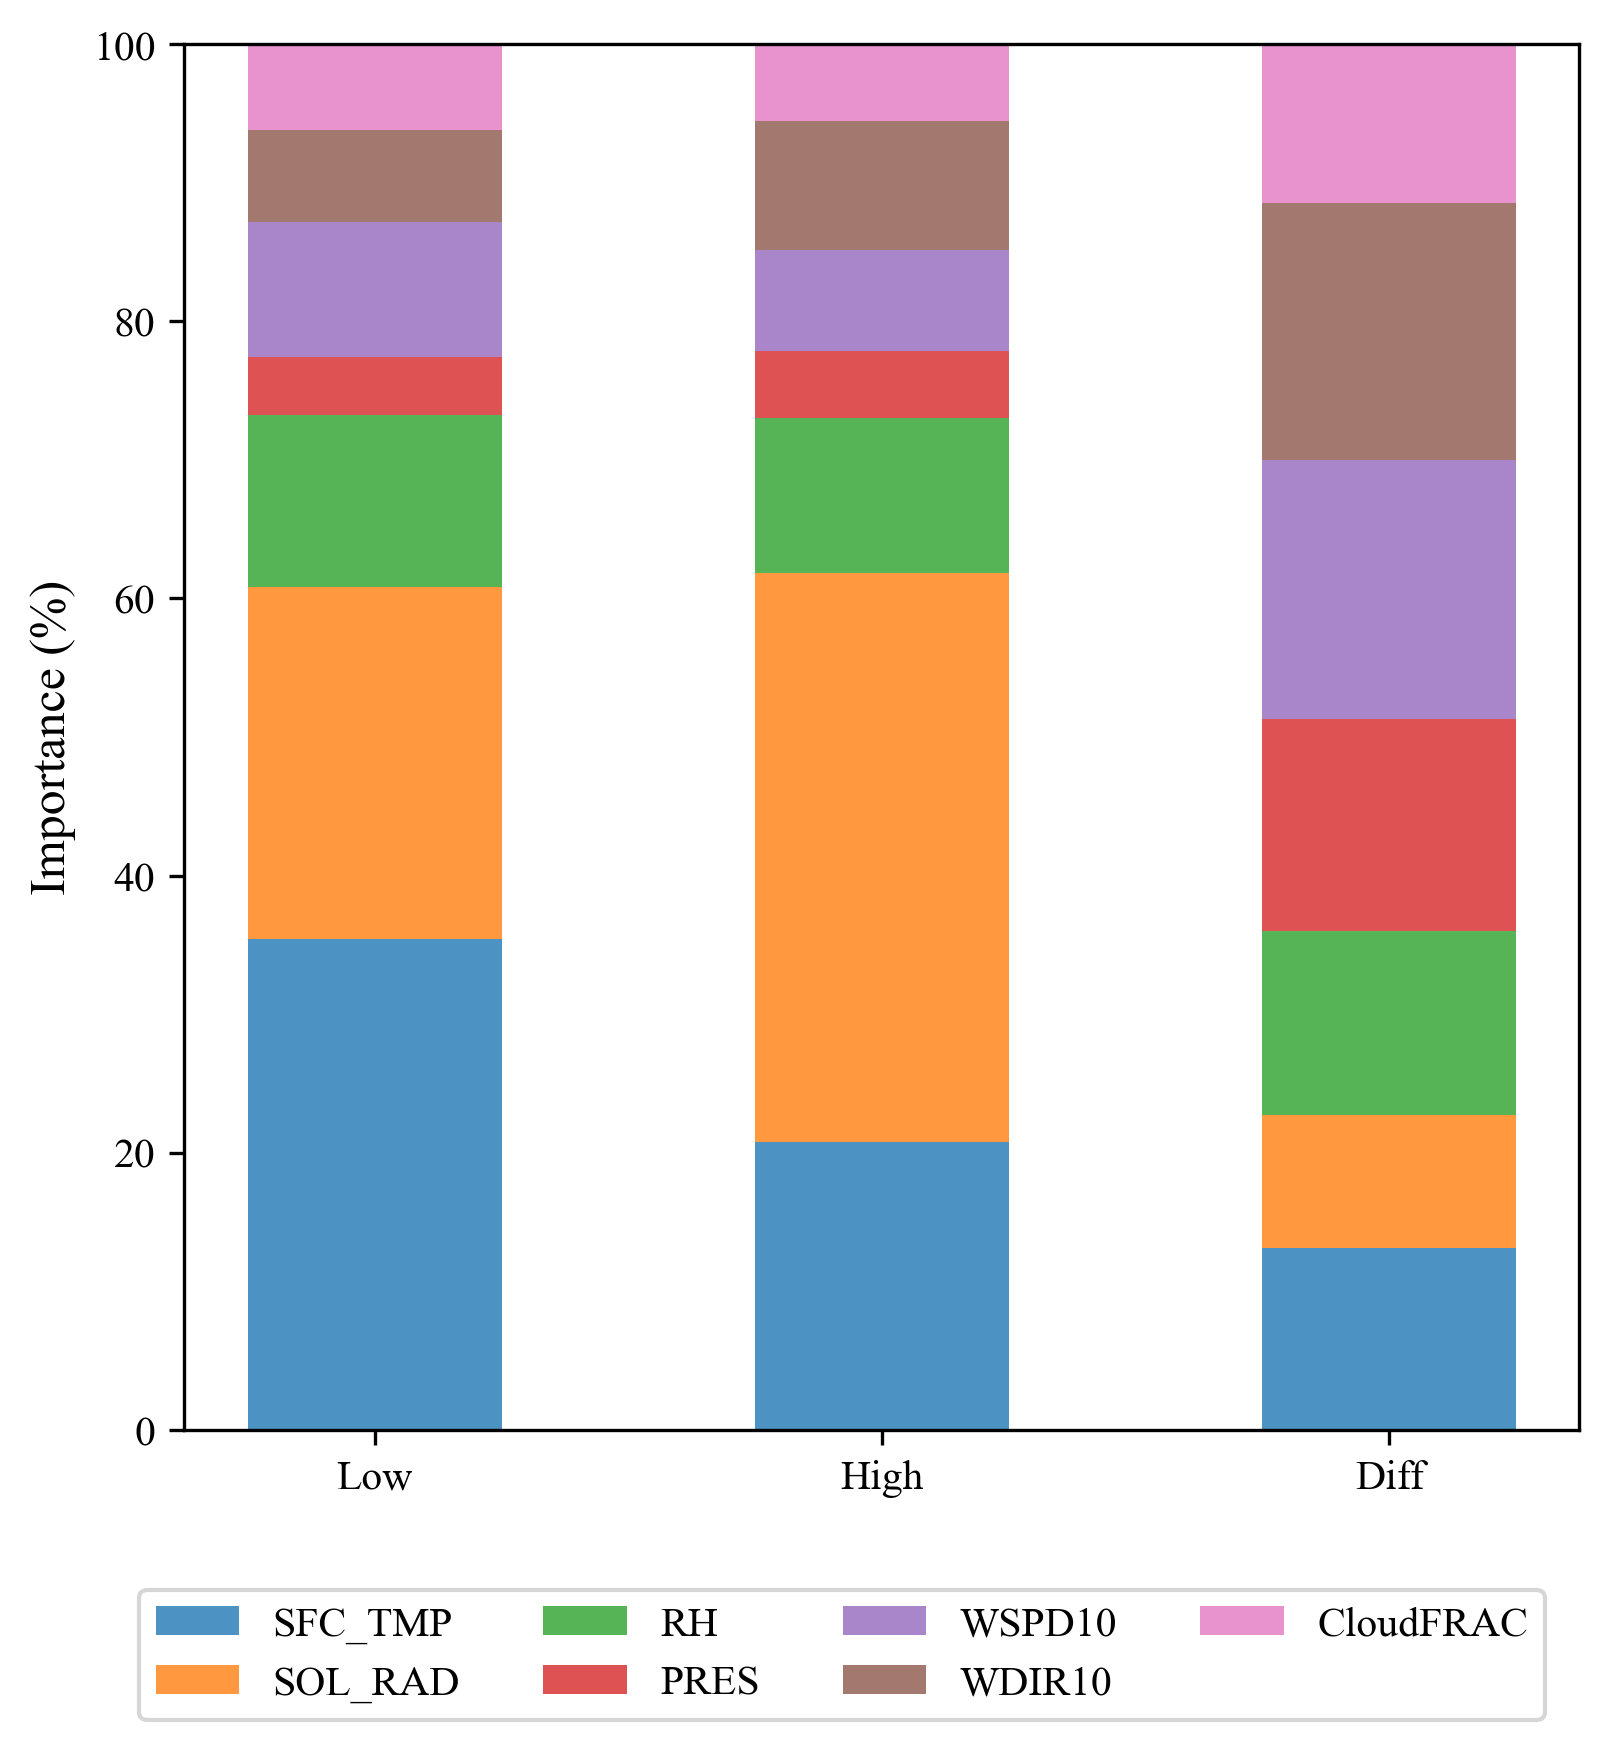

In [44]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.subplots(1,1)

col = dfa.columns
bottom = np.zeros(len(col))
for index in dfa.index:
    ax.bar(col, dfa.loc[index], label=index, bottom=bottom, width=0.5, alpha=0.8)
    bottom += dfa.loc[index]

ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1.1,0.2))
ax.set_yticklabels(np.arange(0,110,20))
ax.set_ylabel('Importance (%)',fontsize=12)
# ax.set_xlabel('Categories')
ax.legend(bbox_to_anchor=(0.99, -0.1),ncol=4)

plt.show()

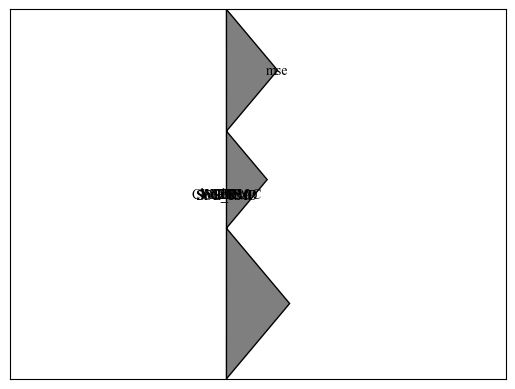

In [17]:
from matplotlib.sankey import Sankey

# 创建Sankey对象
sankey = Sankey(unit=None)

# 添加流程
for index, row in dfa.iterrows():
    sankey.add(flows=[row['Low'], row['High'], row['Diff']], labels=[index, '', ''])

# 绘制桑基图
diagrams = sankey.finish()

# 显示图表
plt.show()